* Pandas is an open source Python library for highly specialized data analysis
* This library has been designed and developed primarily by Wes McKinney starting in 2008; later, in2012, Sien Chang, one of his colleagues, was added to the development
* main purpose processing of data, data extraction, and data manipulation
* The heart of pandas is just the two primary data structures Series and Data Frame

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

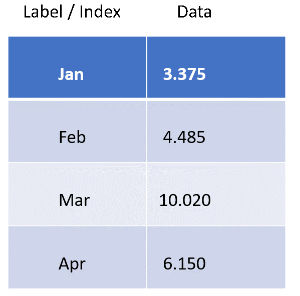

* The Series is the object of the pandas library designed to represent one-dimensional data structures
* There is a value and an index
* By default integer index is assumed, index value can be supplied too

In [2]:
#Creating a Series
s = pd.Series([12,-4,7,9])
print(s)
# By default pandas will create a level from 0
# This can be changed
s = pd.Series([12,-4,7,9], index=['a','b','c','d'])
# Accessing the index and value of a series
s.values
s.index

0    12
1    -4
2     7
3     9
dtype: int64


Index(['a', 'b', 'c', 'd'], dtype='object')

**Accessing single or multiple element from **

In [3]:
# Selecting element of a series
s[2] #can be done by positional index
# Can be done by label as well
s['b']
# Multiple Elements can also be selected from continious position
s[0:2]
# Multiple Elements can also be selected from discontinious position
z=np.array([1,3])
s[z]
s[['a','c']]

a    12
c     7
dtype: int64

**Assigning and Filtering Values**

In [4]:
s[1] = 5
print(s)
s[s > 8]
s==5
s[s==5]

a    12
b     5
c     7
d     9
dtype: int64


b    5
dtype: int64

**Operations and Mathematical functions**

In [5]:
s / 2
np.log(s)

a    2.484907
b    1.609438
c    1.945910
d    2.197225
dtype: float64

**Unique values in a series and isin function**

In [6]:
# Taking look at values
serd = pd.Series([1,0,2,1,2,3], index=['white','white','blue','green','green','yellow'])
serd.unique()
serd.value_counts()
# isin( ) is a function that evaluates the membership, that is, given a list of values, this function
#lets you know if these values are contained within the data structure.
serd.isin([0,3])

white     False
white      True
blue      False
green     False
green     False
yellow     True
dtype: bool

**Members with Null Value**

In [7]:
# Some members can be Null or Not a number
s2 = pd.Series([5,-3,np.NaN,14])
s2.isnull()
s2.notnull()
s2[s2.notnull()]

0     5.0
1    -3.0
3    14.0
dtype: float64

In [8]:
# Series as Dictionaries
mydict = {'red': 2000, 'blue': 1000, 'yellow': 500, 'orange': 1000}
myseries = pd.Series(mydict)

* Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes 
* Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

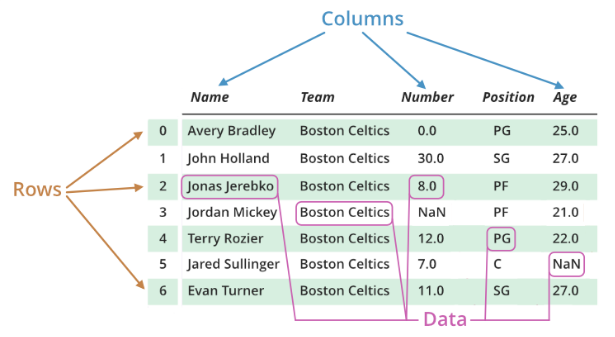

**Creating a data frame**

In [9]:
# The DataFrame is a tabular data structure very similar to the Spreadsheet
data = {'color' : ['blue','green','yellow','red','white'],
'object' : ['ball','pen','pencil','paper','mug'],
'price' : [1.2,1.0,0.6,0.9,1.7]}
df = pd.DataFrame(data)
df

color  object  price
0    blue    ball    1.2
1   green     pen    1.0
2  yellow  pencil    0.6
3     red   paper    0.9
4   white     mug    1.7

**Accessing a data frame**
* There are many methods to access the same
* The ones usedful are loc and iloc. loc uses labels, iloc uses index

In [10]:
# Selecting Rows and Columns
df[1:2]
df['price']
# Selecting third and fifth row
df.iloc[[2,4]]
# Selecting third and fifth row, second and third column
df.iloc[[2,4],[1,2]]


object  price
2  pencil    0.6
4     mug    1.7

**Adding and Removing columns**
* Axis = 0 is rows and Axis = 1 for columns

In [11]:
df['new']=[12,13,14,14,16]
df
# Deleting column
df.drop(['object'],axis=1)

color  price  new
0    blue    1.2   12
1   green    1.0   13
2  yellow    0.6   14
3     red    0.9   14
4   white    1.7   16

** Reading a dataframe from a file **

In [12]:
# reading from file
df = pd.read_csv('../input/btissue/btissue.csv')
# read_csv('ch05_02.csv',skiprows=[2],nrows=3,header=None)
# Similarly read_excel, read_json, read_html etc. is available
# Read_table can be used with text files and separators can be user defined
# Examine first few rows
df.head(3)
# Check the name of the columns
print(df.columns)
print(df.shape)
print(df.dtypes)
print(df.info)


Index(['I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR', 'P',
       'class'],
      dtype='object')
(106, 10)
I0        float64
PA500     float64
HFS       float64
DA        float64
Area      float64
A/DA      float64
Max IP    float64
DR        float64
P         float64
class      object
dtype: object
<bound method DataFrame.info of               I0     PA500       HFS           DA           Area        A/DA  \
0     524.794072  0.187448  0.032114   228.800228    6843.598481   29.910803   
1     330.000000  0.226893  0.265290   121.154201    3163.239472   26.109202   
2     551.879287  0.232478  0.063530   264.804935   11888.391830   44.894903   
3     380.000000  0.240855  0.286234   137.640111    5402.171180   39.248524   
4     362.831266  0.200713  0.244346   124.912559    3290.462446   26.342127   
..           ...       ...       ...          ...            ...         ...   
101  2000.000000  0.106989  0.105418   520.222649   40087.920980   77.059161   
102  2600.000

**Filtering a data frame and summary functions**

In [13]:
# Getting the values of IO when class = car
df['I0'][df['class']=='car']

df.iloc[:,[1,2]][df['class']=='car']
# Getting the vale of IO when class = car
df['I0'][df['class']=='car'].mean()



394.2320129190476

# Merging dataframes

In [14]:

frame1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],'price': [12.33,11.44,33.21,13.23,33.62]})
frame2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],'color': ['white','red','red','black']})
pd.merge(frame1,frame2)
# As the name of the column on the basis of which the merging will happen has same names, it doe snot
# need to be specified, otherwise it can be added with the ON parameter
pd.merge(frame1,frame2,on='id')
# by default merge is inner join, if we need to add other joins we can specify the 'how' parameter

# Assignment create two dataframe one has studendid and marks and another has student id and phone number
# The first dataframe will have values like s1,s2,s3 and 75,78,82 the second dataframe
# will have values like s1,s2,s3 and phone number like 9998764523 etc, Merge them

id  price  color
0    ball  12.33    red
1  pencil  11.44  white
2  pencil  11.44    red
3     pen  33.21  black